In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import os

## TO DO: 
check SMOTE
 
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.IsolationForest.html
IsolationForest — scikit-learn 1.5.2 documentation
Gallery examples: IsolationForest example Comparing anomaly detection algorithms for outlier detection on toy datasets Evaluation of outlier detection estimators
 
https://scikit-learn.org/1.5/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
Comparing anomaly detection algorithms for outlier detection on toy datasets — scikit-learn 1.5.2 documentation
This example shows characteristics of different anomaly detection algorithms on 2D datasets. Datasets contain one or two modes (regions of high density) to illustrate the ability of algorithms to c...
 
KMEANS - DBSCAN

In [4]:
def process_chunks(file_path):
    chunksize = 10 ** 6
    dtype_dict = {'date': 'str', 'serial_number': 'str', 'model': 'str', 'capacity_bytes': 'int32', 'failure': 'bool', 'datacenter': 'str', 'cluster_id': 'int8', 'vault_id': 'int16', 'pod_id': 'int16', 'pod_slot_num': 'float32', 'is_legacy_format': 'bool', 'smart_1_normalized': 'float64', 'smart_1_raw': 'float64', 'smart_2_normalized': 'float64', 'smart_2_raw': 'float64', 'smart_3_normalized': 'float64', 'smart_3_raw': 'float64', 'smart_4_normalized': 'float64', 'smart_4_raw': 'float64', 'smart_5_normalized': 'float64', 'smart_5_raw': 'float64', 'smart_7_normalized': 'float64', 'smart_7_raw': 'float64', 'smart_8_normalized': 'float64', 'smart_8_raw': 'float64', 'smart_9_normalized': 'float64', 'smart_9_raw': 'float64', 'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_11_normalized': 'float64', 'smart_11_raw': 'float64', 'smart_12_normalized': 'float64', 'smart_12_raw': 'float64', 'smart_13_normalized': 'float64', 'smart_13_raw': 'float64', 'smart_15_normalized': 'float64', 'smart_15_raw': 'float64', 'smart_16_normalized': 'float64', 'smart_16_raw': 'float64', 'smart_17_normalized': 'float64', 'smart_17_raw': 'float64', 'smart_18_normalized': 'float64', 'smart_18_raw': 'float64', 'smart_22_normalized': 'float64', 'smart_22_raw': 'float64', 'smart_23_normalized': 'float64', 'smart_23_raw': 'float64', 'smart_24_normalized': 'float64', 'smart_24_raw': 'float64', 'smart_27_normalized': 'float64', 'smart_27_raw': 'float64', 'smart_71_normalized': 'float64', 'smart_71_raw': 'float64', 'smart_82_normalized': 'float64', 'smart_82_raw': 'float64', 'smart_90_normalized': 'float64', 'smart_90_raw': 'float64', 'smart_160_normalized': 'float64', 'smart_160_raw': 'float64', 'smart_161_normalized': 'float64', 'smart_161_raw': 'float64', 'smart_163_normalized': 'float64', 'smart_163_raw': 'float64', 'smart_164_normalized': 'float64', 'smart_164_raw': 'float64', 'smart_165_normalized': 'float64', 'smart_165_raw': 'float64', 'smart_166_normalized': 'float64', 'smart_166_raw': 'float64', 'smart_167_normalized': 'float64', 'smart_167_raw': 'float64', 'smart_168_normalized': 'float64', 'smart_168_raw': 'float64', 'smart_169_normalized': 'float64', 'smart_169_raw': 'float64', 'smart_170_normalized': 'float64', 'smart_170_raw': 'float64', 'smart_171_normalized': 'float64', 'smart_171_raw': 'float64', 'smart_172_normalized': 'float64', 'smart_172_raw': 'float64', 'smart_173_normalized': 'float64', 'smart_173_raw': 'float64', 'smart_174_normalized': 'float64', 'smart_174_raw': 'float64', 'smart_175_normalized': 'float64', 'smart_175_raw': 'float64', 'smart_176_normalized': 'float64', 'smart_176_raw': 'float64', 'smart_177_normalized': 'float64', 'smart_177_raw': 'float64', 'smart_178_normalized': 'float64', 'smart_178_raw': 'float64', 'smart_179_normalized': 'float64', 'smart_179_raw': 'float64', 'smart_180_normalized': 'float64', 'smart_180_raw': 'float64', 'smart_181_normalized': 'float64', 'smart_181_raw': 'float64', 'smart_182_normalized': 'float64', 'smart_182_raw': 'float64', 'smart_183_normalized': 'float64', 'smart_183_raw': 'float64', 'smart_184_normalized': 'float64', 'smart_184_raw': 'float64', 'smart_187_normalized': 'float64', 'smart_187_raw': 'float64', 'smart_188_normalized': 'float64', 'smart_188_raw': 'float64', 'smart_189_normalized': 'float64', 'smart_189_raw': 'float64', 'smart_190_normalized': 'float64', 'smart_190_raw': 'float64', 'smart_191_normalized': 'float64', 'smart_191_raw': 'float64', 'smart_192_normalized': 'float64', 'smart_192_raw': 'float64', 'smart_193_normalized': 'float64', 'smart_193_raw': 'float64', 'smart_194_normalized': 'float64', 'smart_194_raw': 'float64', 'smart_195_normalized': 'float64', 'smart_195_raw': 'float64', 'smart_196_normalized': 'float64', 'smart_196_raw': 'float64', 'smart_197_normalized': 'float64', 'smart_197_raw': 'float64', 'smart_198_normalized': 'float64', 'smart_198_raw': 'float64', 'smart_199_normalized': 'float64', 'smart_199_raw': 'float64', 'smart_200_normalized': 'float64', 'smart_200_raw': 'float64', 'smart_201_normalized': 'float64', 'smart_201_raw': 'float64', 'smart_202_normalized': 'float64', 'smart_202_raw': 'float64', 'smart_206_normalized': 'float64', 'smart_206_raw': 'float64', 'smart_210_normalized': 'float64', 'smart_210_raw': 'float64', 'smart_218_normalized': 'float64', 'smart_218_raw': 'float64', 'smart_220_normalized': 'float64', 'smart_220_raw': 'float64', 'smart_222_normalized': 'float64', 'smart_222_raw': 'float64', 'smart_223_normalized': 'float64', 'smart_223_raw': 'float64', 'smart_224_normalized': 'float64', 'smart_224_raw': 'float64', 'smart_225_normalized': 'float64', 'smart_225_raw': 'float64', 'smart_226_normalized': 'float64', 'smart_226_raw': 'float64', 'smart_230_normalized': 'float64', 'smart_230_raw': 'float64', 'smart_231_normalized': 'float64', 'smart_231_raw': 'float64', 'smart_232_normalized': 'float64', 'smart_232_raw': 'float64', 'smart_233_normalized': 'float64', 'smart_233_raw': 'float64', 'smart_234_normalized': 'float64', 'smart_234_raw': 'float64', 'smart_235_normalized': 'float64', 'smart_235_raw': 'float64', 'smart_240_normalized': 'float64', 'smart_240_raw': 'float64', 'smart_241_normalized': 'float64', 'smart_241_raw': 'float64', 'smart_242_normalized': 'float64', 'smart_242_raw': 'float64', 'smart_244_normalized': 'float64', 'smart_244_raw': 'float64', 'smart_245_normalized': 'float64', 'smart_245_raw': 'float64', 'smart_246_normalized': 'float64', 'smart_246_raw': 'float64', 'smart_247_normalized': 'float64', 'smart_247_raw': 'float64', 'smart_248_normalized': 'float64', 'smart_248_raw': 'float64', 'smart_250_normalized': 'float64', 'smart_250_raw': 'float64', 'smart_251_normalized': 'float64', 'smart_251_raw': 'float64', 'smart_252_normalized': 'float64', 'smart_252_raw': 'float64', 'smart_254_normalized': 'float64', 'smart_254_raw': 'float64', 'smart_255_normalized': 'float64', 'smart_255_raw': 'float64'}
    aggregated_result = pd.DataFrame() 

    for chunk in pd.read_csv(file_path, chunksize=chunksize, dtype=dtype_dict):
        chunk = cleandata_smart(chunk)
        
        aggregated_result = pd.concat([aggregated_result, chunk])

    return aggregated_result

def cleandata_smart(df):
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    smart_allowed = []
    rows_allowed = [1, 3, 5, 7, 9, 187, 189, 190, 195, 197]
    for i in rows_allowed: smart_allowed.append(f'smart_{i}_normalized')
    for column in df.columns:
        if column != 'failure' and column not in smart_allowed and column != "smart_5_raw" and column != "smart_197_raw":
            columns_to_delete.append(column)

    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    failed_drives = df[df['failure'] == True]

    non_failed_drives = df[df['failure'] == False].sample(n=5*len(failed_drives), random_state=42)

    result_df = pd.concat([failed_drives, non_failed_drives])

    result_df = result_df.sample(frac=1, random_state=42)

    df = result_df
    return df


def getdata(folder_path):
    df = pd.DataFrame()
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.concat([df, process_chunks(file_path)])
            print(file_path, ' done')
            # Consider processing data here incrementally to reduce memory footprint
    return df

folder_path = '../data/external/data_Q3_2024'
original_df = getdata(folder_path)

../data/external/data_Q3_2024\2024-07-01.csv  done
../data/external/data_Q3_2024\2024-07-02.csv  done
../data/external/data_Q3_2024\2024-07-03.csv  done
../data/external/data_Q3_2024\2024-07-04.csv  done
../data/external/data_Q3_2024\2024-07-05.csv  done
../data/external/data_Q3_2024\2024-07-06.csv  done
../data/external/data_Q3_2024\2024-07-07.csv  done
../data/external/data_Q3_2024\2024-07-08.csv  done
../data/external/data_Q3_2024\2024-07-09.csv  done
../data/external/data_Q3_2024\2024-07-10.csv  done
../data/external/data_Q3_2024\2024-07-11.csv  done
../data/external/data_Q3_2024\2024-07-12.csv  done
../data/external/data_Q3_2024\2024-07-13.csv  done
../data/external/data_Q3_2024\2024-07-14.csv  done
../data/external/data_Q3_2024\2024-07-15.csv  done
../data/external/data_Q3_2024\2024-07-16.csv  done
../data/external/data_Q3_2024\2024-07-17.csv  done
../data/external/data_Q3_2024\2024-07-18.csv  done
../data/external/data_Q3_2024\2024-07-19.csv  done
../data/external/data_Q3_2024\2

In [5]:
# We will use cleandata_smart because it only uses the values valuable for the paper
def cleandata(df):
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    for column in df.columns:
        if 'normalized' not in column and column != 'failure':
            columns_to_delete.append(column)
    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    return df

def cleandata_smart(df):
    # Open the CSV file as a pandas table
    df.head()
    columns_to_delete = ['date','serial_number','model','capacity_bytes','datacenter','cluster_id','vault_id','pod_id','pod_slot_num','is_legacy_format']
    smart_allowed = []
    rows_allowed = [1, 3, 5, 7, 9, 187, 189, 190, 195, 197]
    for i in rows_allowed: smart_allowed.append(f'smart_{i}_normalized')
    for column in df.columns:
        if 'normalized' not in column and column != 'failure' and column not in smart_allowed and column != "smart_5_raw" and column != "smart_197_raw":
            columns_to_delete.append(column)
    df = df.drop(columns=columns_to_delete)
    df = df.fillna(0)

    failure_count = df['failure'].value_counts()

    min_count = min(failure_count[0], failure_count[1])
    print(f"min_count: {min_count}")

    df = pd.concat([df[df['failure'] == 0].sample(min_count), df[df['failure'] == 1].sample(min_count)])

    return df


In [6]:
# Function to import the dataset
def importdata():
    balance_data = original_df
    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())
    
    return balance_data

importdata()

Dataset Length:  8544
Dataset Shape:  (8544, 13)
Dataset:          failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
123433    False                82.0                91.0               100.0   
23512     False                82.0                85.0               100.0   
56859     False               100.0               100.0               100.0   
121565    False                77.0                92.0               100.0   
49863     False               100.0                 0.0                 0.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
123433          0.0                84.0                53.0   
23512           0.0                96.0                30.0   
56859           0.0               100.0                15.0   
121565          0.0                89.0                88.0   
49863           0.0                 0.0               100.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
123433     

,failure,smart_1_normalized,smart_3_normalized,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_9_normalized,smart_187_normalized,smart_189_normalized,smart_190_normalized,smart_195_normalized,smart_197_normalized,smart_197_raw
123433,False,82.0,91.0,100.0,0.0,84.0,53.0,100.0,0.0,71.0,1.0,100.0,0.0
23512,False,82.0,85.0,100.0,0.0,96.0,30.0,100.0,100.0,67.0,1.0,100.0,0.0
56859,False,100.0,100.0,100.0,0.0,100.0,15.0,0.0,0.0,0.0,0.0,100.0,0.0
121565,False,77.0,92.0,100.0,0.0,89.0,88.0,100.0,0.0,56.0,0.0,100.0,0.0
49863,False,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132060,False,100.0,100.0,100.0,0.0,100.0,9.0,0.0,0.0,0.0,0.0,100.0,0.0
187514,False,100.0,100.0,100.0,0.0,100.0,74.0,0.0,0.0,0.0,0.0,100.0,0.0
205879,False,100.0,84.0,100.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0
57981,False,83.0,94.0,100.0,0.0,90.0,65.0,100.0,0.0,62.0,0.0,100.0,0.0


In [7]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    X = balance_data.values[:, 1:]
    print("X = ", X)
    Y = balance_data.values[:, 0]
    Y=Y.astype('bool')
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    print("x_train:", X_train)
    print("y_train:", np.max(y_train), np.count_nonzero(y_train == 1), len(y_train))
    return X, Y, X_train, X_test, y_train, y_test

In [16]:
depth = 10
leaf = 2

In [17]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=depth, min_samples_leaf=leaf)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


In [18]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=depth, min_samples_leaf=leaf)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


In [19]:
from sklearn.feature_selection import SelectFdr, chi2
# Function to make predictions

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
      cnf_matrix = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix: ",
            cnf_matrix)
      print("Accuracy : ",
            accuracy_score(y_test, y_pred)*100)
      print("Report : ",
            classification_report(y_test, y_pred))
      
      FP = cnf_matrix[0, 1] # False Positives
      FN = cnf_matrix[1, 0]
      TP = cnf_matrix[0, 0]
      TN = cnf_matrix[1, 1]

      FP = FP.astype(float)
      FN = FN.astype(float)
      TP = TP.astype(float)
      TN = TN.astype(float)

      # Sensitivity, hit rate, recall, or true positive rate
      TPR = TP/(TP+FN)
      # Specificity or true negative rate
      TNR = TN/(TN+FP) 
      # Precision or positive predictive value
      PPV = TP/(TP+FP)
      # Negative predictive value
      NPV = TN/(TN+FN)
      # Fall out or false positive rate
      FPR = FP/(FP+TN)
      # False negative rate
      FNR = FN/(TP+FN)
      # False discovery rate
      FDR = FP/(TP+FP)
      # Overall accuracy
      ACC = (TP+TN)/(TP+FP+FN+TN)

      print("FP: ", FP)
      print("FN: ", FN)
      print("TP: ", TP)
      print("TN: ", TN)
      print("TPR: ", TPR)
      print("TNR: ", TNR)
      print("PPV: ", PPV)
      print("NPV: ", NPV)
      print("FPR: ", FPR)
      print("FNR: ", FNR)
      print("FDR: ", FDR)
      print("ACC: ", ACC)


In [20]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(25, 20))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


Dataset Length:  8544
Dataset Shape:  (8544, 13)
Dataset:          failure  smart_1_normalized  smart_3_normalized  smart_5_normalized  \
123433    False                82.0                91.0               100.0   
23512     False                82.0                85.0               100.0   
56859     False               100.0               100.0               100.0   
121565    False                77.0                92.0               100.0   
49863     False               100.0                 0.0                 0.0   

        smart_5_raw  smart_7_normalized  smart_9_normalized  \
123433          0.0                84.0                53.0   
23512           0.0                96.0                30.0   
56859           0.0               100.0                15.0   
121565          0.0                89.0                88.0   
49863           0.0                 0.0               100.0   

        smart_187_normalized  smart_189_normalized  smart_190_normalized  \
123433     

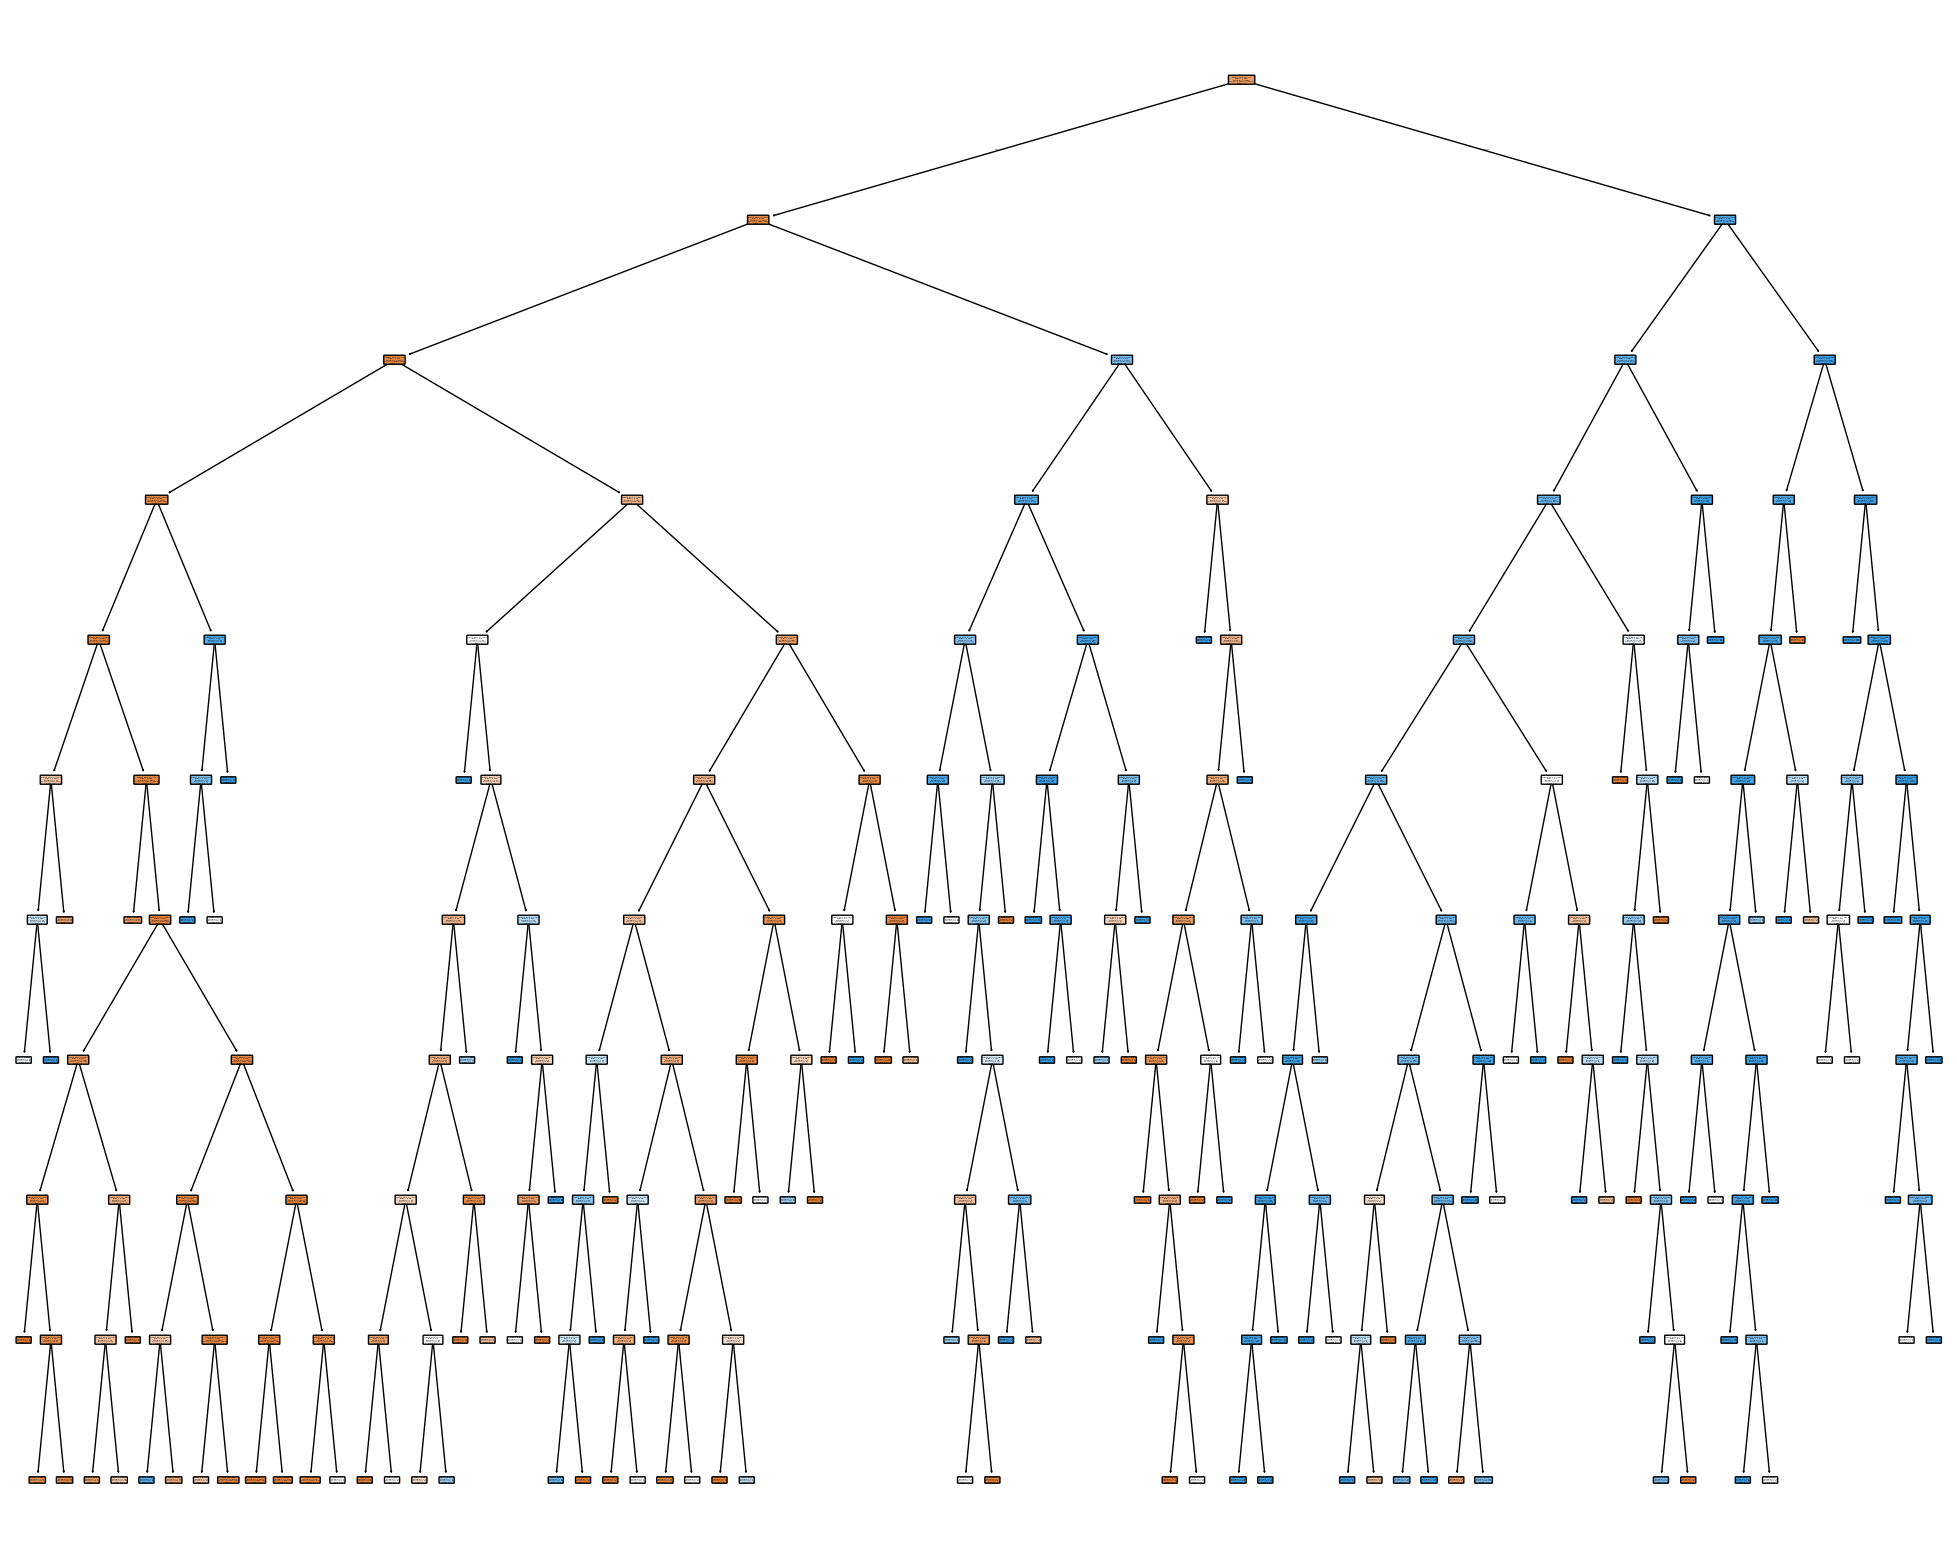

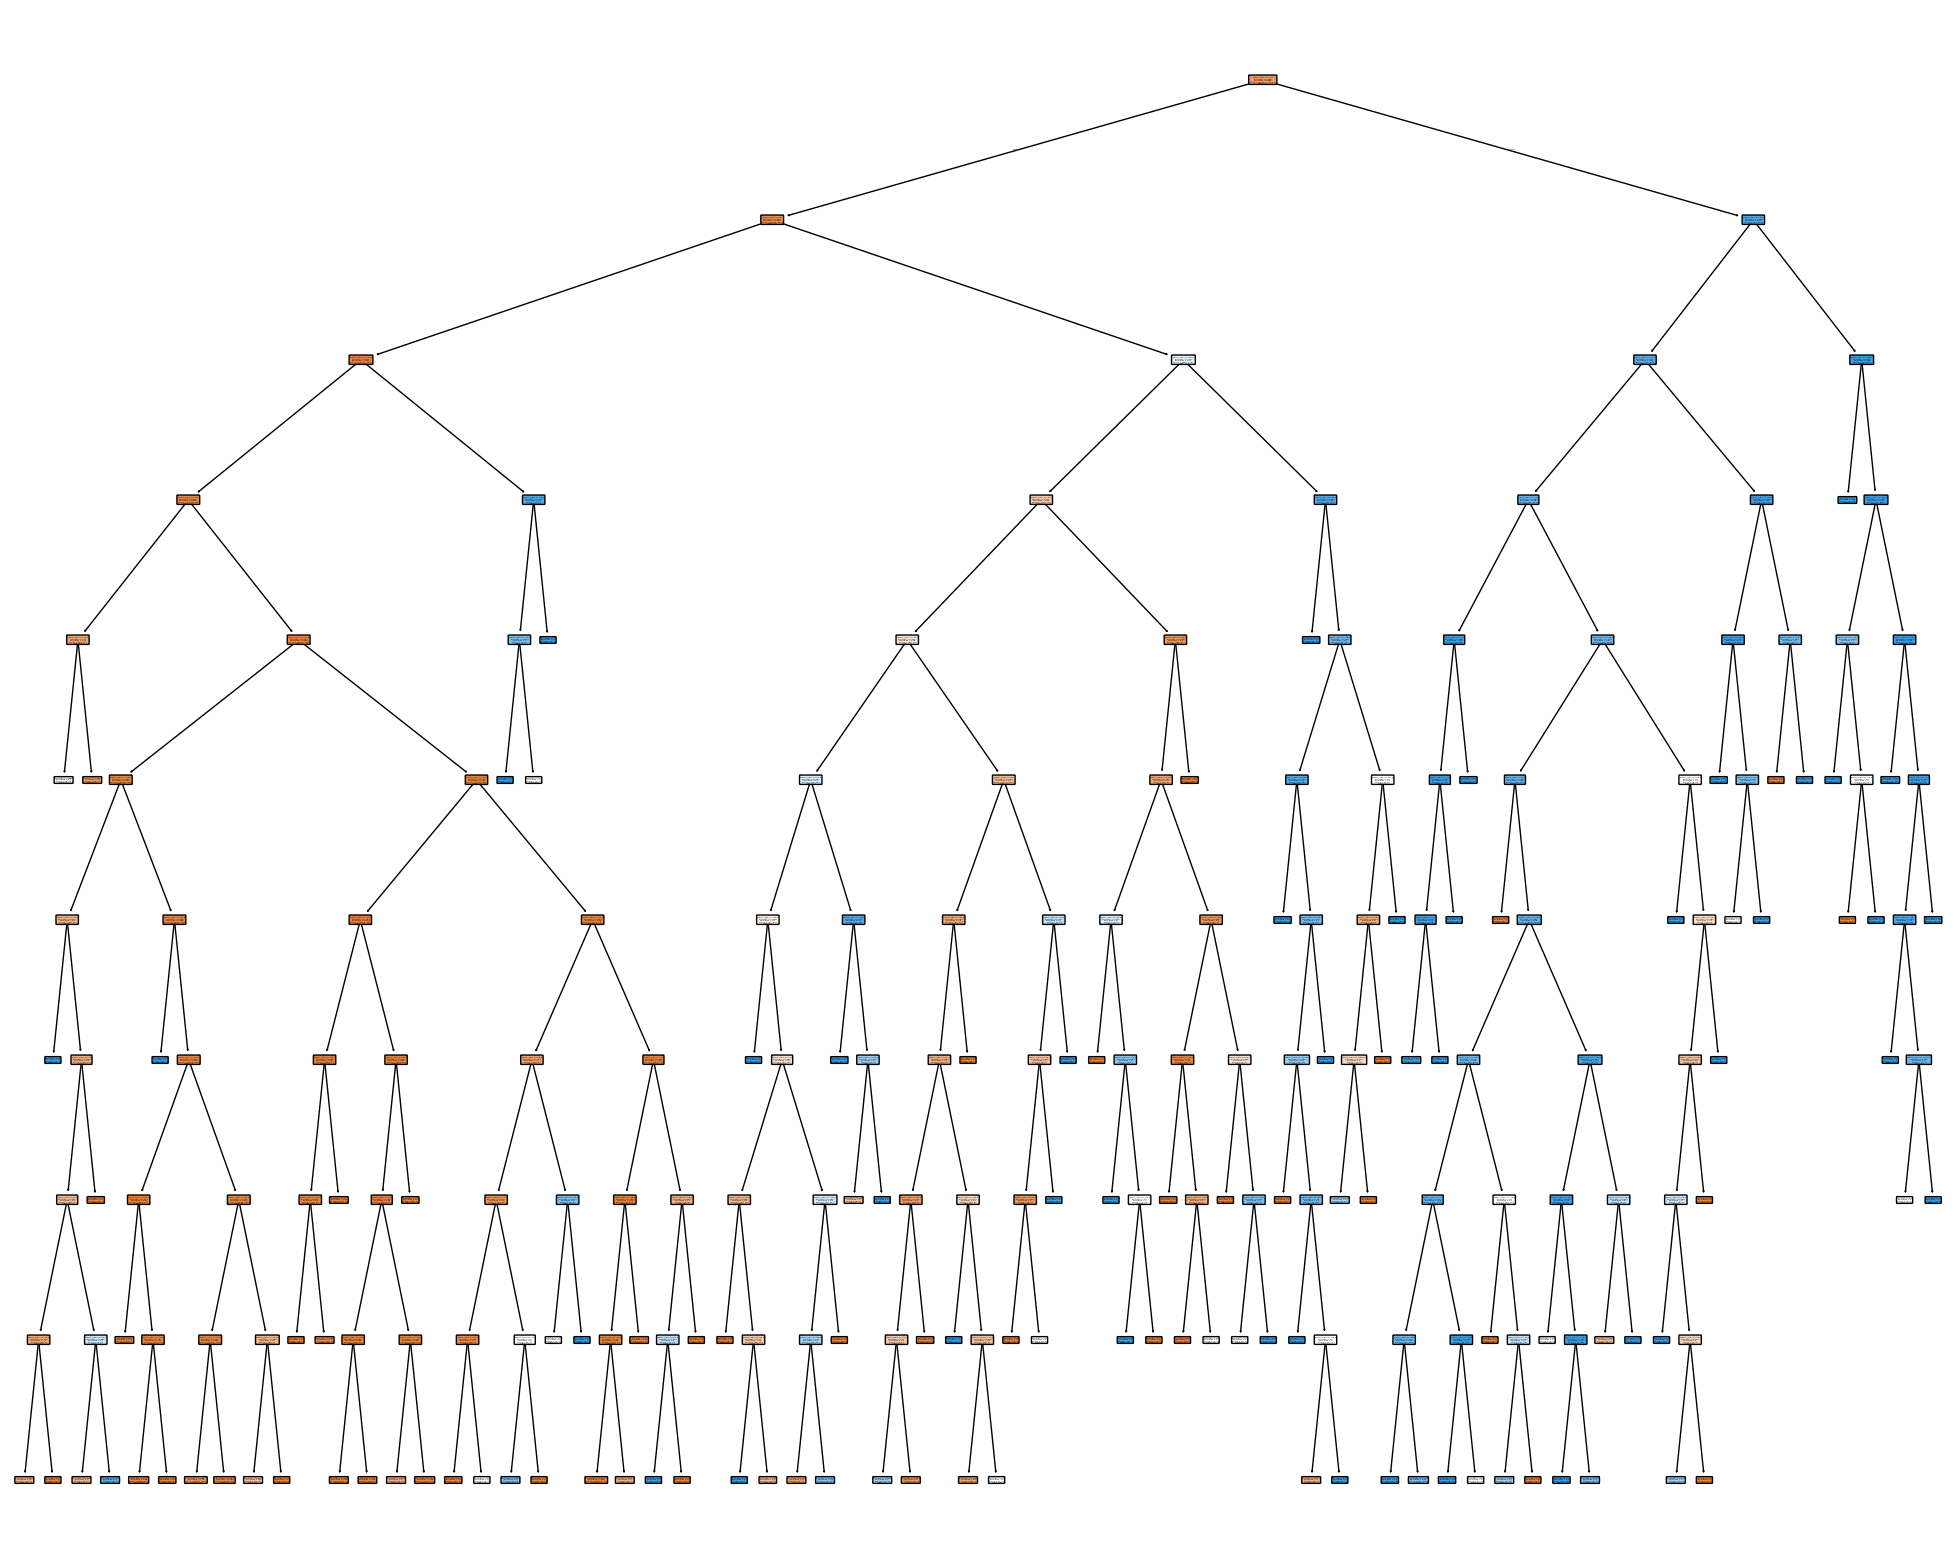

In [21]:
if __name__ == "__main__":
    data = importdata()

    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, [f"smart_{i:03}" for i in range(1, 255)], ['0', '1'])
    plot_decision_tree(clf_entropy, [f"smart_{i:03}" for i in range(1, 255)], ['0', '1'])


In [22]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


Results Using Gini Index:
Predicted values:
[False False False ... False False  True]
Confusion Matrix:  [[2111   47]
 [ 126  280]]
Accuracy :  93.25273010920438
Report :                precision    recall  f1-score   support

       False       0.94      0.98      0.96      2158
        True       0.86      0.69      0.76       406

    accuracy                           0.93      2564
   macro avg       0.90      0.83      0.86      2564
weighted avg       0.93      0.93      0.93      2564

FP:  47.0
FN:  126.0
TP:  2111.0
TN:  280.0
TPR:  0.9436745641484131
TNR:  0.8562691131498471
PPV:  0.9782205746061168
NPV:  0.6896551724137931
FPR:  0.1437308868501529
FNR:  0.05632543585158695
FDR:  0.021779425393883226
ACC:  0.9325273010920437


In [23]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[False False False ... False False  True]
Confusion Matrix:  [[2110   48]
 [ 120  286]]
Accuracy :  93.44773790951638
Report :                precision    recall  f1-score   support

       False       0.95      0.98      0.96      2158
        True       0.86      0.70      0.77       406

    accuracy                           0.93      2564
   macro avg       0.90      0.84      0.87      2564
weighted avg       0.93      0.93      0.93      2564

FP:  48.0
FN:  120.0
TP:  2110.0
TN:  286.0
TPR:  0.9461883408071748
TNR:  0.8562874251497006
PPV:  0.9777571825764597
NPV:  0.7044334975369458
FPR:  0.1437125748502994
FNR:  0.053811659192825115
FDR:  0.022242817423540315
ACC:  0.9344773790951638
